In [ ]:
import numpy as np
import math as math
from matplotlib import pyplot as plt 
import random
from sympy import *
from numpy.linalg import inv

In [ ]:
#1D Heat Transfer Equation

### CHANGE VALUES IN THESE SECTIONS HERE ###
#define variables to be used in equation
alpha = 4.35e-7 # Heat Diffusivity m^2/s
#Value referenced from https://www.researchgate.net/publication/243414074_How_long_does_it_take_to_boil_an_egg_Revisited
x_step = 7.5e-3 # X step in meters
t_step = 10 # T step

#Defining lengths and time limit
length = 0.15 # Length of beam in meters
total_time = 10000 # total time range in seconds

#Initializes the temperature matrix of values
#[Time Iteration Indexes , Indexes of Beam]
temperature = np.zeros((int(total_time/t_step), int(length/x_step)+1)) # +1 is to include the end portion because of how lists are indexed

#Define a starting condition for variables inside the matrix
temperature [0,1:(int(length/x_step))] = 25

#Boundary Conditions
temperature[:,0] = 100
temperature[:,int(length/x_step)] = 100


### END OF CHANGING VALUES ###

#F represents the constant
F = alpha/(x_step**2)*t_step 
stable_criteria = 1- (2*F)
#Conditional statement, this must be stable in order for the explicit time advance scheme to work properly
if stable_criteria <= 0:
  print ("Unstable")

def temp_next (temp_forward_k, temp_now_k, temp_back_k):
  temp = (F * temp_forward_k) + ( (1 - (2 * F)) * temp_now_k) + (F * temp_back_k)
  return temp

#print(temperature)


In [ ]:
#Main Code

time = np.arange(0,total_time,t_step)
position = np.arange(0,(length+x_step),x_step)

for k in range(int(total_time/t_step)-1): 
  for i in range (int(length/x_step)-1):
    temperature[(k+1),(i+1)] = temp_next(temperature[k,(i+2)], temperature[k,i+1], temperature[k,i])
print (temperature)
print (position)
#print (time)

[[100.          25.          25.         ...  25.          25.
  100.        ]
 [100.          30.8         25.         ...  25.          30.8
  100.        ]
 [100.          35.70293333  25.44853333 ...  25.44853333  35.70293333
  100.        ]
 ...
 [100.          97.77095095  95.59678861 ...  95.59678861  97.77095095
  100.        ]
 [100.          97.77519553  95.60517324 ...  95.60517324  97.77519553
  100.        ]
 [100.          97.77943202  95.6135419  ...  95.6135419   97.77943202
  100.        ]]
[0.     0.0075 0.015  0.0225 0.03   0.0375 0.045  0.0525 0.06   0.0675
 0.075  0.0825 0.09   0.0975 0.105  0.1125 0.12   0.1275 0.135  0.1425
 0.15  ]


8200


Text(0, 0.5, 'Temperature in degrees C')

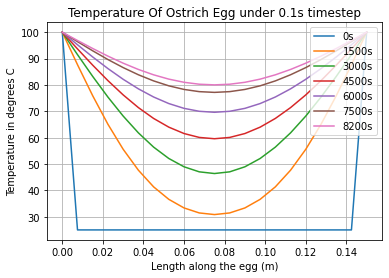

In [ ]:
for j in range(0,int(total_time/t_step)-1,1):
  if temperature[j,10] >=80:
    print (time[j])
    plt.plot(position,temperature[j,:])
    break
  if j%150 == 0:
    plt.plot(position,temperature[j,:])
  
plt.grid(true)
plt.title("Temperature Of Ostrich Egg under 0.1s timestep")
plt.legend(['0s', '1500s', '3000s', '4500s', '6000s', '7500s' , '8200s', '700s','800s','910s'], loc = 'upper right')
plt.xlabel("Length along the egg (m)")
plt.ylabel("Temperature in degrees C")
#plt.plot(temperature[0,:])
#plt.plot(temperature[(total_time-1),:])